In [2]:
import pandas as pd
import nltk 
import re 
import numpy as np 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
pd.set_option('display.max_colwidth', 500)

In [3]:
#nltk.download('all')

In [10]:
stop_words = set(nltk.corpus.stopwords.words('english')) 

## Import file

In [4]:
m = pd.read_csv('metadata.csv')

In [5]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44220 entries, 0 to 44219
Data columns (total 15 columns):
sha                            28462 non-null object
source_x                       44220 non-null object
title                          43996 non-null object
doi                            40750 non-null object
pmcid                          23319 non-null object
pubmed_id                      22943 non-null float64
license                        44220 non-null object
abstract                       35806 non-null object
publish_time                   34197 non-null object
authors                        41074 non-null object
journal                        33173 non-null object
Microsoft Academic Paper ID    964 non-null float64
WHO #Covidence                 1767 non-null object
has_full_text                  44220 non-null bool
full_text_file                 32829 non-null object
dtypes: bool(1), float64(2), object(12)
memory usage: 4.8+ MB


In [6]:
m.groupby('journal').size()

journal
250 Examens de Laboratoire                                               2
3 Biotech                                                                1
A Comprehensive Guide to Toxicology in Nonclinical Drug Development      1
A Comprehensive Guide to Toxicology in Preclinical Drug Development      1
A Librarian's Guide to the Internet                                      1
A Practice of Anesthesia for Infants and Children                        4
A Synopsis of Children's Diseases                                        2
AASRI Procedia                                                           1
ACS Appl Mater Interfaces                                                2
ACS Applied Materials & Interfaces                                       1
ACS Cent Sci                                                             2
ACS Central Science                                                      1
ACS Chem Biol                                                            3
ACS Chemical Neur

In [8]:
m.head()

,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file
0,NaN,Elsevier,Intrauterine virus infections and congenital heart disease,10.1016/0002-8703(72)90077-4,NaN,4361535.0,els-covid,"Abstract The etiologic basis for the vast majority of cases of congenital heart disease remains largely undefined. Viruses have been considered to be likely candidates since the recognition of the association between intrauterine rubella and congenital heart disease. Although the pathogenesis of cardiovascular defects is poorly understood, information gained from the study of congenital rubella syndrome suggests that mechanisms such as focal endothelial cell damage, resulting in obliteration...",1972-12-31,"Overall, James C.",American Heart Journal,NaN,NaN,False,custom_license
1,NaN,Elsevier,Coronaviruses in Balkan nephritis,10.1016/0002-8703(80)90355-5,NaN,6243850.0,els-covid,NaN,1980-03-31,"Georgescu, Leonida; Diosi, Peter; Buţiu, Ioan; Plavoşin, Livia; Herzog, Georgeta",American Heart Journal,NaN,NaN,False,custom_license
2,NaN,Elsevier,Cigarette smoking and coronary heart disease: new evidence and old reactions,10.1016/0002-8703(80)90356-7,NaN,7355701.0,els-covid,NaN,1980-03-31,"Friedman, Gary D",American Heart Journal,NaN,NaN,False,custom_license
3,aecbc613ebdab36753235197ffb4f35734b5ca63,Elsevier,Clinical and immunologic studies in identical twins discordant for systemic lupus erythematosus,10.1016/0002-9343(73)90176-9,NaN,4579077.0,els-covid,"Abstract Middle-aged female identical twins, one of whom had systemic lupus erythematosus (SLE), were evaluated for immunologic reactivity to previous antigenic challenges, including primary immunization with a foreign antigen, keyhole limpet hemocyanin (KLH). These two women had lived together for all of their 58 years and neither was receiving anti-inflammatory or immunosuppressive drugs at the time of these studies. Both twins demonstrated comparable 7S and 198 humoral antibody response t...",1973-08-31,"Brunner, Carolyn M.; Horwitz, David A.; Shann, Mary K.; Sturgill, Benjamin A.; Davis, John S.",The American Journal of Medicine,NaN,NaN,True,custom_license
4,NaN,Elsevier,"Epidemiology of community-acquired respiratory tract infections in adults Incidence, etiology, and impact",10.1016/0002-9343(85)90361-4,NaN,4014285.0,els-covid,"Abstract Upper respiratory tract infections are the most common types of infectious diseases among adults. It is estimated that each adult in the United States experiences two to four respiratory infections annually. The morbidity of these infections is measured by an estimated 75 million physician visits per year, almost 150 million days lost from work, and more than $10 billion In costs for medical care. Serotypes of the rhinoviruses account for 20 to 30 percent of episodes of the common c...",1985-06-28,"Garibaldi, Richard A.",The American Journal of Medicine,NaN,NaN,False,custom_license


## Tokenize Titles

In [7]:
words = nltk.word_tokenize(m['title'].iloc[0])

In [8]:
words

['Intrauterine',
 'virus',
 'infections',
 'and',
 'congenital',
 'heart',
 'disease']

In [21]:
title = []

for r in words: 
    if not r in stop_words: 
        title.append(r)

In [12]:
corpus = np.array(m['title'][m['title'].notna()])

In [13]:
for i in range(len(corpus)):
        corpus[i] = corpus[i].lower()
        corpus[i] = re.sub(r'\W',' ',corpus[i])
        corpus[i] = re.sub(r'\s+',' ',corpus[i])

In [14]:
len(corpus)

43996

In [15]:
wordfreq = {}
for sentence in corpus:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in stop_words:
            if token not in wordfreq.keys():
                wordfreq[token] = 1
            else:
                wordfreq[token] += 1

In [16]:
import heapq
most_freq = heapq.nlargest(50, wordfreq, key=wordfreq.get)

In [17]:
most_freq

['virus',
 'coronavirus',
 'respiratory',
 'infection',
 'viral',
 'human',
 'protein',
 'influenza',
 'disease',
 'syndrome',
 'sars',
 'acute',
 'infectious',
 'health',
 'novel',
 'cell',
 'infections',
 'viruses',
 '1',
 'cells',
 'rna',
 'detection',
 'analysis',
 'chapter',
 'severe',
 '2',
 'based',
 'study',
 'diseases',
 'china',
 'porcine',
 'patients',
 'clinical',
 'cov',
 'associated',
 'vaccine',
 'new',
 'using',
 'epidemic',
 'replication',
 '19',
 'response',
 'index',
 'expression',
 'hepatitis',
 'pneumonia',
 'covid',
 'host',
 'outbreak',
 'control']

## TFIDF Vectorizer

In [17]:
vectorizer = TfidfVectorizer()

In [18]:
vectors = vectorizer.fit_transform(corpus)

In [19]:
feature_names = vectorizer.get_feature_names()

In [21]:
#dense = vectors.todense()

In [22]:
#denselist = dense.tolist()

In [23]:
#df = pd.DataFrame(denselist, columns=feature_names)

## Clustering

In [24]:
kmeans = KMeans(n_clusters=2).fit(vectors)

In [25]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## LDA on titles

In [26]:
m_n = m[m['title'].notna()]

In [27]:
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [28]:
# Tweak the two parameters below
number_topics = 20
number_words = 10

In [29]:
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(m_n['title'])

In [30]:
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=20, n_jobs=-1,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [31]:
np.shape(lda.components_)

(20, 30197)

In [32]:
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
health public global care disease chapter review surveillance control ebola

Topic #1:
virus advances recent electron open microscopy life new research hepatitis

Topic #2:
rna virus protein index replication viral proteins structure hiv subject

Topic #3:
virus infection cells immune type vaccine response interferon infectious responses

Topic #4:
analysis virus human host viruses genetic gene coronaviruses genome reveals

Topic #5:
influenza pandemic h1n1 virus avian viruses 2009 h5n1 pathogenic h7n9

Topic #6:
diarrhea epidemic porcine virus index china current author cross genome

Topic #7:
feline contents antiviral activity volume cats peritonitis anti infectious cat

Topic #8:
high screening chinese inhibitors evaluation biological medicine design based using

Topic #9:
virus hepatitis antibodies mouse antibody protein reproductive syndrome monoclonal porcine

Topic #10:
coronavirus 19 covid novel 2019 sars china outbreak infection disease

Topic 

## LDA on abstracts

In [33]:
m_n_a = m[m['abstract'].notna()]

In [34]:
len(m_n_a)

35806

In [35]:
# Tweak the two parameters below
number_topics_abstract = 20
number_words_abstract = 10

In [36]:
count_vectorizer_abstract = CountVectorizer(stop_words='english')
count_data_abstract = count_vectorizer_abstract.fit_transform(m_n_a['abstract'])

In [37]:
# Create and fit the LDA model
lda_abstract = LDA(n_components=number_topics_abstract, n_jobs=-1)
lda_abstract.fit(count_data_abstract)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=20, n_jobs=-1,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [38]:
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda_abstract, count_vectorizer_abstract, number_words_abstract)

Topics found via LDA:

Topic #0:
vaccine vaccines antibody antibodies virus specific immune responses influenza development

Topic #1:
cats feline rats disease ace2 dogs fip angiotensin cat blood

Topic #2:
bacteria bacterial unknown pathogens water abstract food antimicrobial applications use

Topic #3:
health public disease control outbreak care china risk cases infectious

Topic #4:
infection genes zikv expression cell hiv supplementary material cells stress

Topic #5:
et asthma les la des le en airway une exacerbations

Topic #6:
pcr samples detection virus assay rt positive strains using detected

Topic #7:
calves pedv diarrhea porcine pigs virus tgev rotavirus group days

Topic #8:
viruses virus human viral disease host species infections humans influenza

Topic #9:
infection hbv hcv cell apoptosis cells results study virus ev71

Topic #10:
cells infection virus cell mice immune viral ifn expression response

Topic #11:
hcov cells blood hsv 229e ifn nl63 oc43 human activity

Topi

## Look @ topic 10?

In [39]:
np.shape(lda_abstract.components_)

(20, 101664)

In [40]:
topics = lda_abstract.transform(count_data_abstract)

In [41]:
np.shape(topics)

(35806, 20)

In [42]:
for idx in range(number_topics_abstract):
    col_name = 'Topic ' + str(idx) + ' Strength'
    m_n_a[col_name] = topics[:, idx]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
#m_n_a['Topic 10 Strength'] = topics[:, 10]

In [44]:
m_n_a[['title', 'Topic 10 Strength', 'Topic 0 Strength',
       'Topic 1 Strength', 'Topic 2 Strength', 'Topic 3 Strength',
       'Topic 4 Strength', 'Topic 5 Strength', 'Topic 6 Strength',
       'Topic 7 Strength', 'Topic 8 Strength', 'Topic 9 Strength',
       'Topic 11 Strength', 'Topic 12 Strength', 'Topic 13 Strength',
       'Topic 14 Strength', 'Topic 15 Strength', 'Topic 16 Strength',
       'Topic 17 Strength', 'Topic 18 Strength', 'Topic 19 Strength']].head()

,title,Topic 10 Strength,Topic 0 Strength,Topic 1 Strength,Topic 2 Strength,Topic 3 Strength,Topic 4 Strength,Topic 5 Strength,Topic 6 Strength,Topic 7 Strength,...,Topic 9 Strength,Topic 11 Strength,Topic 12 Strength,Topic 13 Strength,Topic 14 Strength,Topic 15 Strength,Topic 16 Strength,Topic 17 Strength,Topic 18 Strength,Topic 19 Strength
0,Intrauterine virus infections and congenital heart disease,0.093851,0.000296,0.200220,0.000296,0.000296,0.171925,0.000296,0.000296,0.000296,...,0.068658,0.000296,0.000296,0.000296,0.000296,0.043958,0.000296,0.000296,0.000296,0.000296
3,Clinical and immunologic studies in identical twins discordant for systemic lupus erythematosus,0.000649,0.508538,0.096778,0.000649,0.000649,0.000649,0.000649,0.000649,0.000649,...,0.022350,0.113348,0.000649,0.000649,0.000649,0.202672,0.047224,0.000649,0.000649,0.000649
4,"Epidemiology of community-acquired respiratory tract infections in adults Incidence, etiology, and impact",0.000278,0.000278,0.000278,0.036237,0.078214,0.000278,0.000278,0.000278,0.000278,...,0.000278,0.035771,0.000278,0.000278,0.000278,0.584178,0.000278,0.000278,0.000278,0.000278
5,Infectious diarrhea: Pathogenesis and risk factors,0.083940,0.000526,0.000526,0.216637,0.000526,0.000526,0.000526,0.000526,0.238265,...,0.000526,0.000526,0.050414,0.000526,0.000526,0.000526,0.000526,0.000526,0.107260,0.000526
6,New perspectives on the pathogenesis of rheumatoid arthritis,0.612872,0.000446,0.228793,0.027188,0.000446,0.000446,0.000446,0.000446,0.000446,...,0.000446,0.000446,0.000446,0.000446,0.041414,0.000446,0.000446,0.000446,0.000446,0.000446


In [45]:
m_n_a.sort_values(['Topic 10 Strength'], ascending=False).iloc[:10]

,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,...,Topic 10 Strength,Topic 11 Strength,Topic 12 Strength,Topic 13 Strength,Topic 14 Strength,Topic 15 Strength,Topic 16 Strength,Topic 17 Strength,Topic 18 Strength,Topic 19 Strength
31373,NaN,PMC,Distinct Immune Responses in Resistant and Susceptible Strains of Mice during Neurovirulent Alphavirus Encephalomyelitis,10.1128/JVI.00173-15,PMC4524229,NaN,unk,"Susceptibility to alphavirus encephalomyelitis is dependent on a variety of factors, including the genetic background of the host. Neuroadapted Sindbis virus (NSV) causes uniformly fatal disease in adult C57BL/6 (B6) mice, but adult BALB/c (Bc) mice recover from infection. In B6 mice, fatal encephalomyelitis is immune mediated rather than a direct result of virus infection. To identify the immunological determinants of host susceptibility to fatal NSV-induced encephalomyelitis, we compared v...",NaN,"Kulcsar, Kirsten A.; Baxter, Victoria K.; Abraham, Rachy; Nelson, Ashley; Griffin, Diane E.",...,0.996360,0.000192,0.000192,0.000192,0.000192,0.000192,0.000192,0.000192,0.000192,0.000192
31225,NaN,PMC,Myd88 Initiates Early Innate Immune Responses and Promotes CD4 T Cells during Coronavirus Encephalomyelitis,10.1128/JVI.01199-15,PMC4542380,NaN,unk,"Myd88 signaling is critical to the control of numerous central nervous system (CNS) infections by promoting both innate and adaptive immune responses. Nevertheless, the extent to which Myd88 regulates type I interferon (IFN) versus proinflammatory factors and T cell function, as well as the anatomical site of action, varies extensively with the pathogen. CNS infection by neurotropic coronavirus with replication confined to the brain and spinal cord induces protective IFN-α/β via Myd88-indepe...",NaN,"Butchi, Niranjan; Kapil, Parul; Puntambekar, Shweta; Stohlman, Stephen A.; Hinton, David R.; Bergmann, Cornelia C.",...,0.996332,0.000193,0.000193,0.000193,0.000193,0.000193,0.000193,0.000193,0.000193,0.000193
21148,c59d6e789176b928523129adb96ca495720a3b4a,PMC,Enhanced CD8 T-cell anti-viral function and clinical disease in B7-H1-deficient mice requires CD4 T cells during encephalomyelitis,10.1186/1742-2094-9-269,PMC3545890,23237504.0,cc-by,"BACKGROUND: Anti-viral CD8 T-cell activity is enhanced and prolonged by CD4 T-cell-mediated help, but negatively regulated by inhibitory B7-H1 interactions. During viral encephalomyelitis, the absence of CD4 T cells decreases CD8 T cell activity and impedes viral control in the central nervous system (CNS). By contrast, the absence of B7-H1 enhances CD8 T-cell function and accelerates viral control, but increases morbidity. However, the relative contribution of CD4 T cells to CD8 function in...",2012 Dec 14,"Phares, Timothy W; Stohlman, Stephen A; Hinton, David R; Bergmann, Cornelia C",...,0.996058,0.000207,0.000207,0.000207,0.000207,0.000207,0.000207,0.000207,0.000207,0.000207
31675,NaN,PMC,Suppressors of Cytokine Signaling 1 and 3 Are Upregulated in Brain Resident Cells in Response to Virus-Induced Inflammation of the Central Nervous System via at Least Two Distinctive Pathways,10.1128/JVI.01346-14,PMC4249144,NaN,unk,"Suppressors of cytokine signaling (SOCS) proteins are intracellular proteins that inhibit cytokine signaling in a variety of cell types. A number of viral infections have been associated with SOCS upregulation; however, not much is known about the mechanisms regulating SOCS expression during viral infection. In this study, we used two pathologically distinct intracerebral (i.c.) infection models to characterize temporal and spatial aspects of SOCS expression in the virus-infected central ner...",NaN,"Steffensen, Maria Abildgaard; Fenger, Christina; Christensen, Jeanette Erbo; Jørgensen, Carina Krogsgaard; Bassi, Maria Rosaria; Christensen, Jan Pravsgaard; Finsen, Bente; Thomsen, Allan Randrup",...,0.995476,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238
21494,d4ea57e72c42657125

In [46]:
len(m_n_a[['title', 'abstract']][m_n_a['Topic 10 Strength'] > 0.9])

367

In [47]:
m_n_a[['title', 'abstract']][m_n_a['Topic 10 Strength'] > 0.9]

,title,abstract
263,Difference in sensitivity to interferon among mouse hepatitis viruses with high and low virulence for mice,"Abstract Mouse hepatitis viruses (MHV) of different virulence for mice were studied with respect to interferon (IFN) sensitivity. The growth of low-virulent MHV-S and intermediately virulent MHV-JHM was significantly suppressed in IFN-treated L cells compared with untreated cells. However, a comparable suppression of the growth of highly virulent MHV-2 was not observed in IFN-treated cells. This differential effect of IFN treatment could also be demonstrated at the level of viral mRNA and vi..."
720,Differential modulation of MHC class I antigen expression on mouse brain endothelial cells by MHV-4 infection,"Abstract Virus-induced modulation of mouse cerebral endothelial cell class I and class II antigens by the neurotropic coronavirus, MHV-4 (JHM), was examined by flow cytometry. In susceptible BALB/c, H-2Kd was downregulated, while H-2Dd was upregulated following infection by MHV-4. In contrast, H-2K and H-2D antigens were both upregulated in either MHV-4-susceptible B10.S and (BALB/c × SJL) F1, or MHV-4-resistant SJL-derived cerebral endothelial cells following infection with this virus. Clas..."
734,Demyelination induced by murine hepatitis virus JHM strain (MHV-4) is immunologically mediated,"Abstract The neurotropic mouse hepatitis viruses (MHV), in particular strain JHM (JHMV or MHV-4), cause experimental central nervous system demyelination that pathologically resembles multiple sclerosis, an important human demyelinating disease. The mechanism of JHMV-induced demyelination remains unclear, though its tropism for oligodendrocytes had led to the belief that JHMV causes demyelination by direct lysis of these myelin-producing cells. However, several studies have also implicated t..."
742,Differential suppression of interferon-γ-induced Ia antigen expression on cultured rat astroglia and microglia by second messengers,"Abstract The roles of intracellular second messengers in interferon-γ (IFN-γ)-induced Ia antigen (Ag) expression by astroglia and microglia were examined. Ia Ag on both glia types was induced by IFN-γ. Reagents known to increase intracellular cAMP or activate intracellular protein kinase C (PKC) reduced IFN-γ-induced Ia Ag expression by astroglia. In contrast, increasing intracellular cAMP had no suppressive effect on Ia Ag expression by microglia. These results indicate (1) cAMP and PKC neg..."
746,"Mouse hepatitis virus (MHV-4, JHM) blocks γ-interferon-induced major histocompatibility complex class II antigen expression on murine cerebral endothelial cells","Abstract The regulation of γ-interferon-induced major histocompatibility complex (MHC) class II antigen expression on mouse cerebral endothelial cells by the neurotropic mouse hepatitis virus (MHV-4, JHM) was studied in vitro. The results presented demonstrate that MHV-4 can selectively block γ-interferon-induced class II antigen expression on cerebral endothelial cells. The blocking effect of class II expression occurs in a strain-dependent manner, and is limited to virus-susceptible mouse ..."
1314,"Interaction of mouse hepatitis virus 3 with Kupffer cells explanted from susceptible and resistant mouse strains. Antiviral activity, interleukin-1 synthesis","Abstract The genetic sensitivity of mouse strains to mouse hepatitis virus 3 (MHV 3) has been related in vitro to a delay of virus replication in liver sinusoidal cells. In vivo immuno-histochemical studies of the liver from infected mice have demonstrated that mechanisms other than direct viral injury are in operation. To examine potential mechanisms, the interaction of lipopolysaccharide (LPS)-stimulated Kupffer cells with MHV 3 was studied. We first observed a dramatic inhibition in viral..."
1534,Cytokine network in the central nervous system and its roles in growth and differentiation of glial and neuronal cells,"Abstract Cells resident within the central nervous syst

## Word Cloud

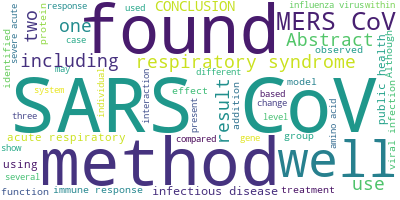

In [48]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(m['abstract'][m['abstract'].notna()].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

## Most basic - non-pharm in title

In [49]:
len(m_n_a[(m_n_a['title'].str.contains('non-pharm')) & (m_n_a['title'].notna())])

8

In [50]:
non_pharm = m_n_a[(m_n_a['title'].str.contains('non-pharm')) & (m_n_a['title'].notna())]

In [51]:
non_pharm[['Topic 10 Strength', 'Topic 0 Strength',
       'Topic 1 Strength', 'Topic 2 Strength', 'Topic 3 Strength',
       'Topic 4 Strength', 'Topic 5 Strength', 'Topic 6 Strength',
       'Topic 7 Strength', 'Topic 8 Strength', 'Topic 9 Strength',
       'Topic 11 Strength', 'Topic 12 Strength', 'Topic 13 Strength',
       'Topic 14 Strength', 'Topic 15 Strength', 'Topic 16 Strength',
       'Topic 17 Strength', 'Topic 18 Strength', 
       'Topic 19 Strength']].idxmax(axis=1)

10868     Topic 3 Strength
20037    Topic 14 Strength
21967     Topic 3 Strength
22000     Topic 3 Strength
22541    Topic 15 Strength
31805     Topic 3 Strength
40358     Topic 3 Strength
40476     Topic 3 Strength
dtype: object

## Okay so Topics 9 and 10 primarily could be useful - makes sense

Topic #9:
cases 95 19 ci covid china risk data age study

Topic #10:
health public disease diseases research infectious care control review global

In [52]:
len(m_n_a[(m_n_a['Topic 9 Strength'] > .5) | (m_n_a['Topic 10 Strength'] > 0.5)])

2827

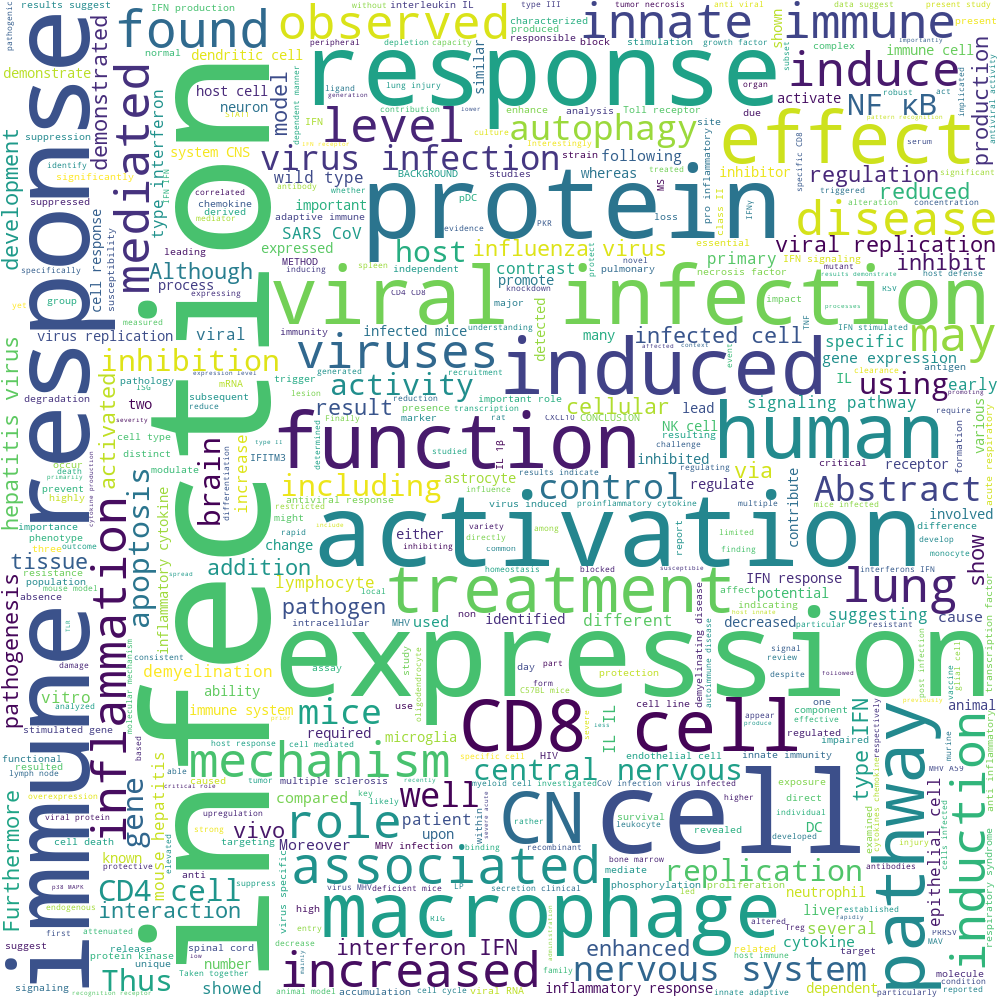

In [53]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(m_n_a['abstract'][(m_n_a['Topic 9 Strength'] > .5) |
                                              (m_n_a['Topic 10 Strength'] > 0.5)].values))
# Create a WordCloud object
wordcloud = WordCloud(width = 1000, height = 1000, 
                      background_color="white", max_words=500, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

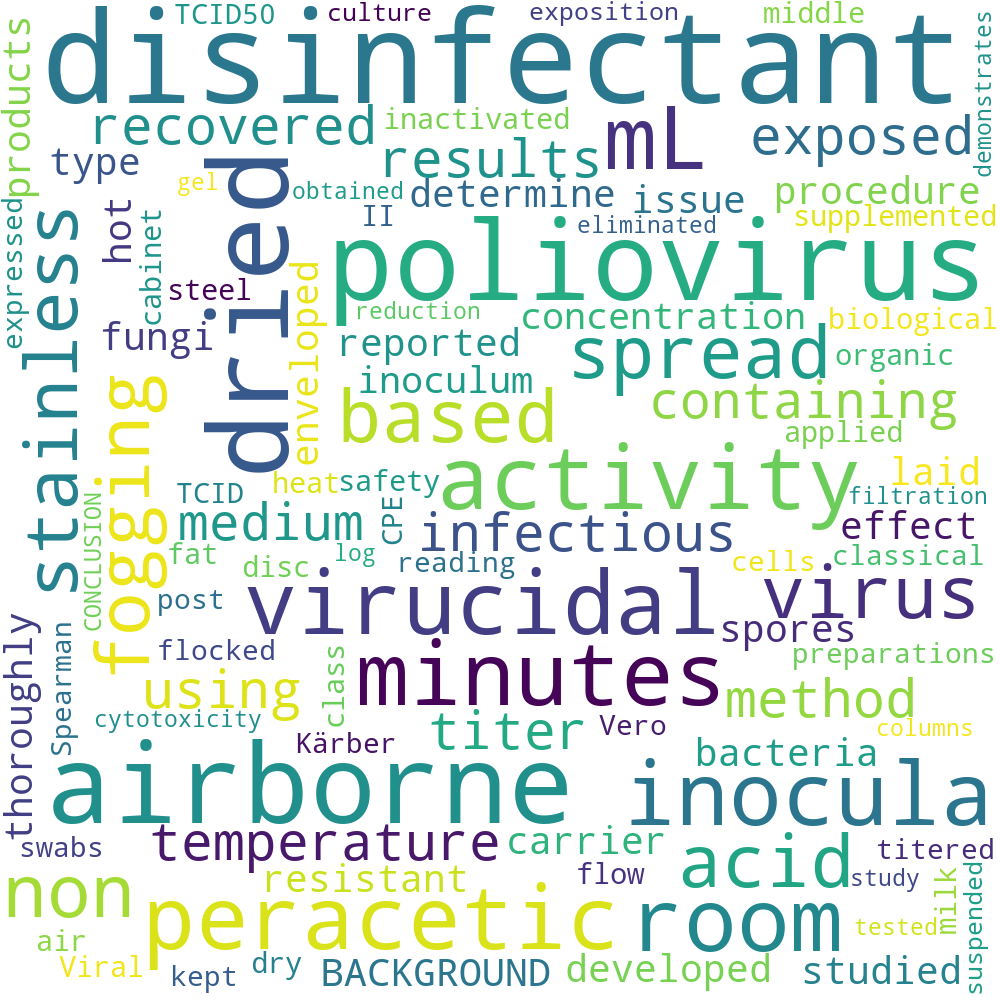

In [54]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(m_n_a['abstract'][(m_n_a['Topic 9 Strength'] > .8)].values))
# Create a WordCloud object
wordcloud = WordCloud(width = 1000, height = 1000, 
                      background_color="white", max_words=500, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

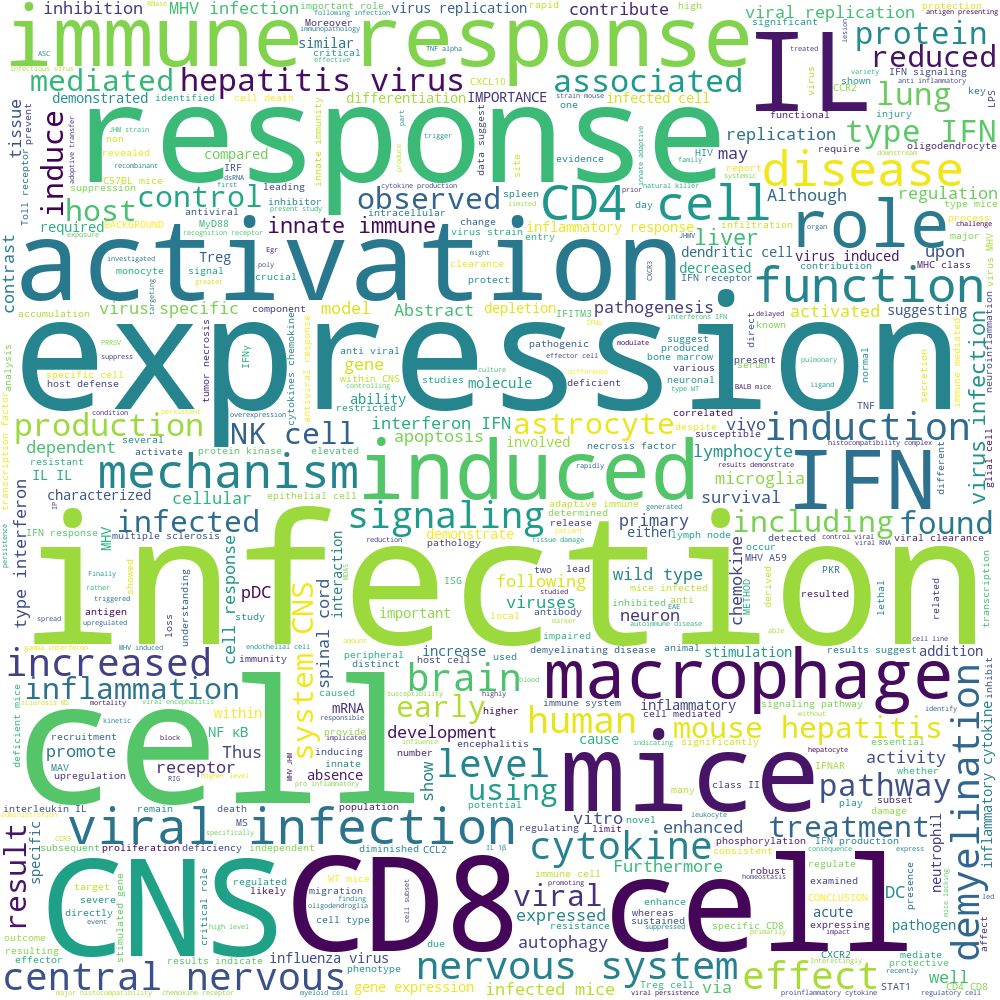

In [55]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(m_n_a['abstract'][(m_n_a['Topic 10 Strength'] > .8)].values))
# Create a WordCloud object
wordcloud = WordCloud(width = 1000, height = 1000, 
                      background_color="white", max_words=500, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

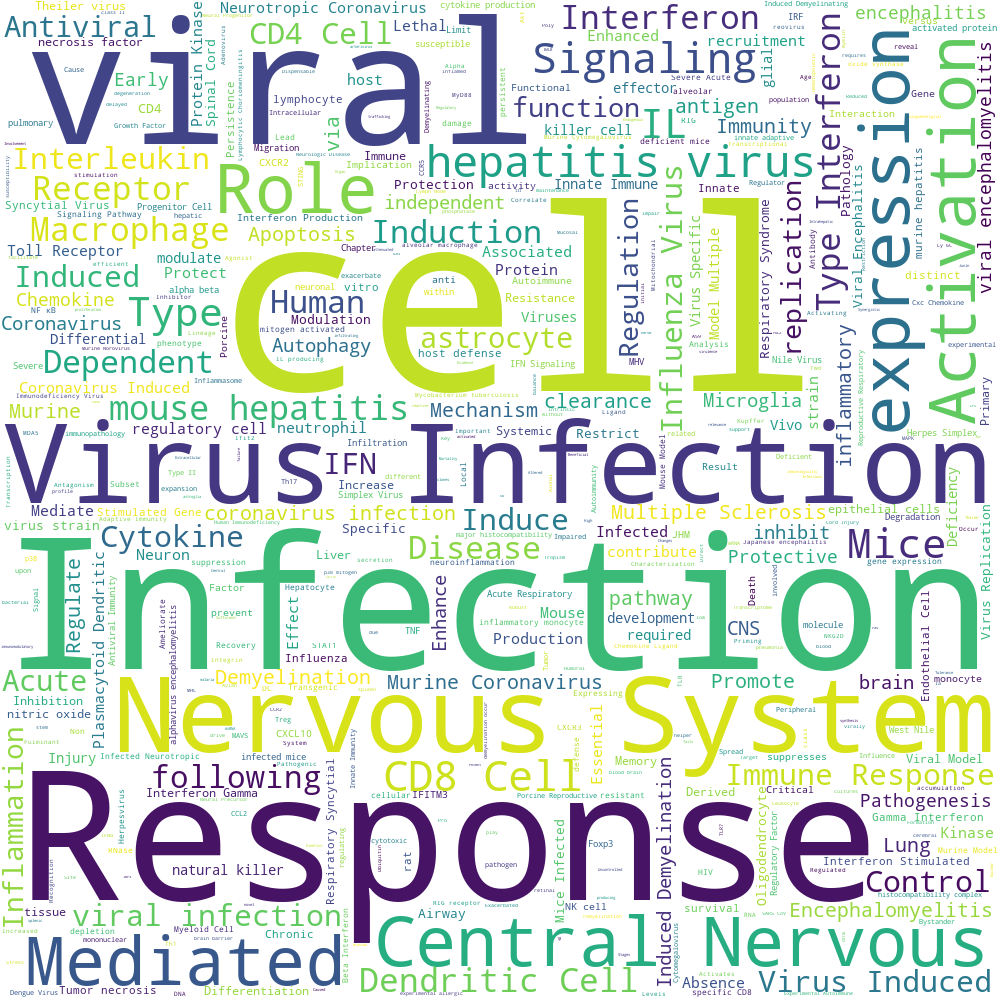

In [56]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(m_n_a['title'][(m_n_a['Topic 10 Strength'] > .8)].values))
# Create a WordCloud object
wordcloud = WordCloud(width = 1000, height = 1000, 
                      background_color="white", max_words=500, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

## Interesting words...

- Surveillance
- Ethical
- Challenges and opportunities
- Prevention 
- Law
- urban
- Planning


## Titles
- Challenges and opportunities in pandemic influenza planning: lessons learned from recent infectious disease preparedness and response efforts
- Prevention of Medical Events During Air Travel: A Narrative Review
- Ethical consideration articles

In [57]:
m_n_a[['title', 'abstract']][(m_n_a['title'].str.contains('Planning')) & 
                             (m_n_a['title'].notna())]

,title,abstract
2419,"Chapter 42 Emergency Preparedness — Planning and Management* * Originally from Colling R, York TW. Hospital and healthcare security. Boston, MA: Butterworth-Heinemann; 2010. Updated by the editor, Elsevier, 2011.","This chapter discusses the planning and management aspects that go into emergency preparations and general preparedness. The basics of emergency planning are discussed, as well as certain tasks that affect everyone that will help reduce panic and confusion during a real emergency."
2560,Chapter 12 Planning and Managing Health Systems,"Abstract Health systems are complex organizations. They are often the largest single employer in a country, with expenditures of public and private money of 4–17 percent of gross domestic product. Overall and individual facility management requires mission statements, objectives, targets, budgets, activities planning, human interaction, services delivery, and quality assurance. Health organization involves a vast complex of stakeholders and participants, suppliers and purchasers, regulators ..."
2722,"Chapter 11 Airport Emergency Planning, Part II Emergency Management Functions","Abstract Airport Emergency Planning, Part II provides an overview of the core functions within airport emergency management, which include command, control, and communications (C3) and law enforcement, firefighting, public notification, emergency medical response, and resource management. Many airport emergencies require public notifications and, in some cases, Protective Actions, such as evacuation and shelter-in-place. Police, fire, and other Emergency Medical Services (EMS) comprise the c..."
2858,1 Planning for known and unknown risks,"Abstract This chapter covers standard definitions of duty of care, example case law where employer duty of care was applicable, a variety of sample risks and concerns that employers and travelers should be aware of, in context with a travel risk management program."
2993,11 Contingency Planning Emergency Response and Safety,"Abstract Although there is some recognition of the importance of contingency planning, far too few firms have anything beyond a contingency plan that sits on a shelf in the CEO’s office. Even in those companies with crisis management teams (CMTs), the members often do not meet to plan or even discuss how the team would function in an actual situation. The most progressive firms offer the team members, fire brigades, and employees an opportunity to preplan (contingency planning) through mock ..."
4501,Chapter 24 Emergency Preparedness—Planning and Management,"Publisher Summary In general, emergencies can be divided into internal and external situations. Regardless of the nature of the emergency, the organizational response will be quite different when the emergency condition exists within the facility from when it occurs at some distant location. The actual emergency response programs of healthcare facilities indicate that much more effort has gone into a prepared response to external emergencies than to internal emergencies. Exceptions can be fo..."
11159,Planning and priority setting for vaccine development and immunization,"Abstract We review a sequence of strategic planning efforts over time in the United States, all involving processes to prioritize new vaccine candidates. The Institute of Medicine of the National Academies of Sciences, Engineering, and Medicine has been involved in three priority setting processes, each using different metrics and methodologies: infant mortality equivalents (1985–1986), cost-effectiveness (2000), and more recently, the implementation of a software system based on a broader m..."
15190,Planning for the Next Global Pandemic,"Abstract In order to mitigate human and financial losses as a result of future global pandemics, we must plan now. As the Ebola virus pandemic declines, we must reflect on how we have mismanaged this recent international crisis and how we can better prepare for the next globa

In [58]:
m_n_a[['title', 'abstract']][(m_n_a['title'].str.contains(' urban ')) & 
                             (m_n_a['title'].notna())]

,title,abstract
183,Epithelial injury and interstitial fibrosis in the proximal alveolar regions of rats chronically exposed to a simulated pattern of urban ambient ozone,"Abstract Electron microcopic morphometry was used to study the development of lung injury during and after chronic (78 weeks) exposure to a pattern of ozone (O3) designed to simulate high urban ambient concentrations that occur in some environments. The daily exposure regimen consisted of a 13-hr background of 0.06 ppm, an exposure peak that rose from 0.06 to 0.25 ppm, and returned to the background level over a 9-hr period, and 2-hr downtime for maintenance. Rats were exposed for 1, 3, 13, ..."
440,Hazard to man and the environment posed by the use of urban waste compost: a review,"Abstract This review presents the current state of knowledge on the relationship between the environment and the use of municipal waste compost in terms of health risk assessment. The hazards stem from chemical and microbiological agents whose nature and magnitude depend heavily on the degree of sorting and on the composting methods. Three main routes of exposure can be determined and are quantified in the literature: (i) The ingestion of soil/compost mixtures by children, mostly in cases of..."
5323,"Respiratory syncytial virus bronchiolitis, weather conditions and air pollution in an Italian urban area: An observational study","Abstract Background In this study we sought to evaluate the association between viral bronchiolitis, weather conditions, and air pollution in an urban area in Italy. Methods We included infants hospitalized for acute bronchiolitis from 2004 to 2014. All infants underwent a nasal washing for virus detection. A regional agency network collected meteorological data (mean temperature, relative humidity and wind velocity) and the following air pollutants: sulfur dioxide, nitrogen oxide, carbon mo..."
6235,Basic public health services delivered in an urban community: a qualitative study,"Summary Objectives To understand the advancements in and barriers to the implementation of measures to improve basic public health services in an urban Chinese community. Study design A qualitative study based on semi-structured interviews. Interviews were audio-taped, transcribed and analysed using thematic content analysis. Methods In-depth interviews were undertaken with the directors of the management centres for community health services in 15 of the 18 districts in Beijing from Decembe..."
7040,A health-based assessment of particulate air pollution in urban areas of Beijing in 2000–2004,"Abstract Particulate air pollution is a serious problem in Beijing. The annual concentration of particulate matter with aerodynamic diameter less than 10 μm (PM10), ranging from 141 to 166 μg m−3 in 2000–2004, could be very harmful to human health. In this paper, we presented the mortality and morbidity effects of PM10 pollution based on statistical data and the epidemiological exposure–response function. The economic costs to health during the 5 years were estimated to lie between US$1670 a..."
7049,Ascertaining the impact of public rapid transit system on spread of dengue in urban settings,"Abstract Urbanization is an important factor contributing to the global spread of dengue in recent decades, especially in tropical regions. However, the impact of public transportation system on local spread of dengue in urban settings remains poorly understood, due to the difficulty in collecting relevant locality, transportation and disease incidence data with sufficient detail, and in suitably quantifying the combined effect of proximity and passenger flow. We quantify proximity and passe..."
9879,Improving the wind environment in high-density cities by understanding urban morphology and surface roughness: A study in Hong Kong,"Abstract In this study, a high-resolution frontal area density (FAD) map that depicts the surface roughness of urban Hong Kong is produced using a mapping method that take

In [59]:
m_n_a[['title', 'abstract']][(m_n_a['title'].str.contains('Law')) & 
                             (m_n_a['title'].notna())]

,title,abstract
439,"Pathology and toxicology of beluga whales from the St. Lawrence Estuary, Quebec, Canada. Past, present and future","Abstract An indigenous population of 450–500 beluga whales (Delphinapterus leucas) inhabiting the St. Lawrence Estuary has been exposed chronically for more than 50 years to a complex mixture of industrial pollutants including organochlorinated compounds (OC), polycyclic aromatic hydrocarbons (PAH) and heavy metals. From 1983 to 1990, we have necropsied 45 well preserved carcasses out of a total of 120 beluga whales reported dead over this period. Of these 45 animals, nine were affected by 1..."
2182,"Law, and Public Health Policy","Two of the most important tools that assist states in protecting their populations against threats to health are public health policy and public health law. Policy can exist without recourse to law, but where policy has been designed for a long-term purpose, and where voluntary compliance has not proved successful, policy may need the heavier hand of law for implementation. However, law is not always an appropriate mechanism for achieving public health objectives. This article explores the b..."
2183,International Law and Public Health Policy,"The field of international public health and the contribution of international organizations to its development is described. The growth and elaboration of the field of international public health law in the last decade and a half is one of the most notable developments in global health policy. In this new era of global health governance, international law has an important, albeit limited, role to play in promoting and coordinating international cooperation and national action to protect and..."
2563,"Chapter 15 Health Technology, Quality, Law, and Ethics","Abstract Technology assessment capability is vital in determining health policy and priorities because science and technology changes occur rapidly and are essential for progress. Quality is promoted by high professional education and practice standards, accreditation by state and non governmental authorities for health provider institutions, public health departments as well as educational program for public health, health policy and health management. Quality is an ongoing challenge in hea..."
2919,Global Health Law: International Law and Public Health Policy,"Abstract The field of global health law and the contribution of international organizations to its development are described. The growth and elaboration of the field of global health law in the last two decades is one of the most notable developments in global health policy. In this new era of global health governance, international law has an important, albeit limited, role to play in promoting and coordinating international cooperation and national action to protect and promote global heal..."
2954,13 Public Health Law I Complications of Federalism,"Abstract This chapter will explain the origins and current operations of public health emergency law, at both the federal and state levels. You will learn how public health law in the United States began as an area entrusted almost entirely to cities and the states. As transportation, and with it the possibility of rapid disease spread, became ever faster and more accessible, the original reliance on local containment mechanisms became outdated. As you will see throughout this chapter, howev..."
2955,14 Public Health Law II Contemporary Threats,"Abstract In this chapter, we will explore how the legal system is responding to the biggest public health threats of the moment. “Of the moment” may be the key phrase here. We have seen in the previous chapter how disease became associated in the public mind with threats from “outsiders,” which led to medically unwarranted quarantines in the 19th and early 20th centuries. After those fears subsided and the Great Influenza Epidemic of 1918 ran its course, the field of public health settled in..."
3168,Chapter 12 International 

In [60]:
m_n_a[['title', 'abstract']][(m_n_a['title'].str.contains('Travel')) & 
                             (m_n_a['title'].notna())]

,title,abstract
2138,1 Travel,"Publisher Summary Travel changes people and places. The traveler can be the target and sufferer from microbial threats; the traveler can also provide the microbial transport system. Traveling humans alter infectious diseases patterns by introducing pathogenic microbes or resistance, or virulence factors into new populations. The movement of pathogenic microbes through history has been intimately linked to the capacity of humans to travel and to migrate to new locations. Today, humans have th..."
2551,"Chapter 7 Transportation Travel by Air, Car, and Train","Abstract This chapter deals with issues of transportation and how they interact with the world of tourism security. The chapter examines such issues as air transportation security and safety, issues of fire at airport terminals, and issues of health and international travel, both from the perspective of the traveler and from the perspective of the host community. The chapter also examines some of the issues dealing with both train travel and motor coach travel and develops a template for how..."
3500,7 Pretravel Considerations for Non-vaccine-Preventable Travel Infections,"Abstract Pretravel advice should be tailored to the individual following a thorough review of his or her itinerary, planned activities, and host characteristics. In addition to vaccinations and malaria chemoprophylaxis, a pretravel consultation should include advice on regionally endemic or emerging non–vaccine-preventable infections that can cause severe illness or chronic morbidity. These include mosquito-borne infections such as dengue, chikungunya, and Zika, and regionally endemic severe..."
3503,40 Cruise Ship Travel,"Abstract Cruise ships can be amplifiers of infectious diseases because of the close human proximity of semiclosed ship environments. The most common diagnoses of cruise passengers evaluated in cruise ship infirmaries include upper respiratory infections, injury, seasickness, and gastrointestinal illness. Cruise ship passengers may experience clusters of brief self-limited diarrheal disease, although this rate is much lower risk than on land. Certain groups, such as the elderly, pregnant wome..."
3506,56 Fever in Returned Travelers,"Abstract Predominant causes of fever vary by different geographic areas of exposure. Malaria is the most common overall cause of systemic febrile illness in travelers returning from tropical areas; dengue is the most common cause in travelers to some regions. The approach to a febrile patient must consider travel and exposure history, incubation period, mode of exposure, and impact of pretravel vaccination. Initial symptoms of self-limited and life-threatening infections may be similar; foca..."
3529,150 Fever in the Returned Traveler,"Abstract International travel is associated with a risk of infections not typically seen in high-income settings. Malaria is the most important tropical infection in travelers, but epidemics of dengue, chikungunya, and Zika emphasize that clinicians need to be aware of the rapidly changing distribution of many arboviruses. A detailed travel history and a syndromic approach to the investigation and management of patients is key. Consultation with a specialist is often recommended to ensure th..."
3621,Global Climate Changes and International Trade and Travel: Effects on Human Health Outcomes,"There is now near-unanimous scientific agreement that greenhouse gas emissions generated by human activities have increased global temperatures and changed the earth's climate. There is, however, no universal agreement on how rapidly, regionally, or asymmetrically the earth will warm; or on the true impact of global warming on infectious disease outbreaks and natural disasters and their inevitable public health outcomes. In addition, many other factors influence the emergence and reemergence..."
4768,Prevention of Medical Events During Air Travel: A Narrative Review,"Abstract Prior to traveling, and when seeki

In [61]:
m_n_a[['title', 'abstract']][(m_n_a['title'].str.contains('Prevention')) & 
                             (m_n_a['title'].notna())]

,title,abstract
2731,Chapter 8 Quasispecies Dynamics in Disease Prevention and Control,"Abstract Medical interventions to prevent and treat viral disease constitute evolutionary forces that may modify the genetic composition of viral populations that replicate in an infected host, as well as those that expand at the epidemiological level. Strategies intended to minimize vaccination and treatment failures are proposed, and justified based on fundamental features of viral dynamics. The recommended use of complex, multiepitopic vaccines and combination therapies as early as possib..."
2931,"Viral Infections, an Overview with a Focus on Prevention of Transmission","Abstract Viruses are obligatory intracellular pathogens with a simple structure consisting of assembled proteins enclosing the nucleic acid genome with or without a lipid envelope. Despite increasing availability of rapid nucleic acid amplification assays for laboratory diagnosis, effective antivirals, and safe vaccines, the control of most viral infections depends on time-honored surveillance and infection control measures. Moreover most viruses can be readily destroyed by common disinfecta..."
2932,"Principles of Infectious Diseases: Transmission, Diagnosis, Prevention, and Control","Abstract Infectious disease control and prevention relies on a thorough understanding of the factors determining transmission. This article summarizes the fundamental principles of infectious disease transmission while highlighting many of the agent, host, and environmental determinants of these diseases that are of particular import to public health professionals. Basic principles of infectious disease diagnosis, control, and prevention are also reviewed."
3143,"Chapter 2 Omics Approaches in Viral Biotechnology Toward Understanding the Viral Diseases, Prevention, Therapy, and Other Applications in Human Betterment","Abstract Biotechnology deals with the manipulation of genetic material to achieve the desired outputs. Viruses have been popular agents used in biotechnological research and applications. Viruses are compact entities that have the ability to carry the genetic material to the cell and thus facilitate the safe transport and integration of genetic material to the target cell. Therefore viruses are used in various biotechnology applications such as production of vaccines, production of therapeut..."
3523,20 Infection Prevention and Control in the Tropics,"Abstract Tropical settings present unique challenges to the practice of infection prevention and control. These are multi-faceted due to differences in the climate, culture, social, and political milieu of low- and middle-income countries situated in the tropics, as well as the lack of resources. The emergence of communicable diseases and low vaccination coverage also lead to nosocomial augmentation of community outbreaks, further increasing the economic burden of hospital management. Addres..."
4768,Prevention of Medical Events During Air Travel: A Narrative Review,"Abstract Prior to traveling, and when seeking medical pretravel advice, patients consult their personal physicians. Inflight medical issues are estimated to occur up to 350 times per day worldwide (1/14,000-40,000 passengers). Specific characteristics of the air cabin environment are associated with hypoxia and the expansion of trapped gases into body cavities, which can lead to harm. The most frequent medical events during air travel include abdominal pain; ear, nose, and throat pathologies..."
5699,Efficacy of a Dried Colostrum Powder in the Prevention of Disease in Neonatal Holstein Calves,"Abstract The efficacy of a dried colostrum powder, DCW Concentrate™, as a colostrum supplement or substitute was tested using four groups of 15 calves. Physical condition and IgG status were examined during the first 30 d of life. Calves were fed the dried colostrum powder (group A), pooled colostrum (group C), or both (groups B and D) 2h after birth. Calves fed 85g of the dri

In [62]:
m_n_a[['title', 'abstract']][(m_n_a['title'].str.contains('Challenges and opportunities')) & 
                             (m_n_a['title'].notna())]

,title,abstract
6218,Challenges and opportunities for surveillance data to inform public health policy on chronic non-communicable diseases: Canadian perspectives,"Summary A number of major challenges face surveillance systems in the field of chronic disease. The complex interplay of risk factors and determinants that result in chronic disease is calling into question traditional surveillance systems in terms of what is collected to inform policy decisions. At the same time, the complexity presents an opportunity to broaden the evidence base on which arguments can be based for chronic disease intervention to increase their potential to influence policy..."
11710,Towards appropriate mainstreaming of “Theory of Change” approaches into agricultural research for development: Challenges and opportunities,"Abstract Food insecurity persists in many parts of Africa and Asia, despite ongoing agricultural research for development (AR4D) interventions. This is resulting in a growing demand for alternative approaches to designing and evaluating interventions in complex systems. Theory of Change (ToC) is an approach which may be useful because it enables stakeholders to present and test their theories and assumptions about why and how impact may occur, ideally within an environment conducive to itera..."
12476,Challenges and opportunities in pandemic influenza planning: lessons learned from recent infectious disease preparedness and response efforts,"Abstract The impact of the next pandemic influenza is likely to be far greater, by orders of magnitude, than most bioterrorism (BT) scenarios. A written pandemic emergency plan and establishment of emergency management teams are critical to mounting a coordinated and effective response to what will be a catastrophic event. Members of these teams should include public health, medical, emergency response and public safety officials, organized at each local, state and federal level. The tragic ..."
12620,Challenges and opportunities for enhancing biotechnology and technology transfer in developing countries,"Abstract Biotechnological innovation is gaining increased recognition as an important tool for improving global health. The challenge, however, lies in defining the role of technology transfer to develop therapies for diseases prevalent in developing countries. During the past decade, a large disparity emerged between the developed and developing world in accessing affordable medicines because of the pharmaceutical industry's focus on health areas bearing greatest profits. Discussed herein a..."
12629,Challenges and opportunities in the purification of recombinant tagged proteins,"Abstract The purification of recombinant proteins by affinity chromatography is one of the most efficient strategies due to the high recovery yields and purity achieved. However, this is dependent on the availability of specific affinity adsorbents for each particular target protein. The diversity of proteins to be purified augments the complexity and number of specific affinity adsorbents needed, and therefore generic platforms for the purification of recombinant proteins are appealing stra..."
15607,Dealing with bio- and ecological complexity: Challenges and opportunities,Abstract The complexities of the dynamic processes and their control associated with biological and ecological systems offer many challenges for the control engineer. Over the past decades the application of dynamic modelling and control has aided understanding of their complexities. At the same time using such complex systems as test-beds for new control methods has highlighted their limitations (e.g. in relation to system identification) and has thus acted as a catalyst for methodological ...


In [63]:
m_n_a[['title', 'abstract']][(m_n_a['title'].str.contains('Ethical')) & 
                             (m_n_a['title'].notna())]

,title,abstract
2270,"Chapter eleven Social, Cultural and Ethical Issues in the Traumatic Stress Field","Publisher Summary This chapter describes how the impact of psychological trauma differs depending upon the social and cultural context and the social and cultural resources available to individuals, families and communities. Disadvantaged persons and communities such as those experiencing poverty, stigma and discrimination, disabilities, homelessness, political repression, communal/societal violence (including military and gang warfare), forced immigration (refugees), interrogation and tortu..."
2971,"Chapter 13 Ethical Issues in Public Health* * This case report is largely derived and modified from Tulchinsky T.H., Varavikova E.A., The new public health, 3rd edition. Academic Press/Elsevier: San Diego, 2014, chapter 15 pages 804–816.","Abstract The field of public health includes a wide scope of activities and professional disciplines, ranging from sanitation, health protection, epidemiology, environmental health, financing, health promotion, including supervision, or the provision of clinical care. Each of these disciplines works in systems that face ethical dilemmas, making it important that public health workers have motivation to understand and practice within the ethical guidelines of their profession, thus making eth..."
7515,"Ethical Issues in the Response to Ebola Virus Disease in US Emergency Departments: A Position Paper of the American College of Emergency Physicians, the Emergency Nurses Association and the Society for Academic Emergency Medicine","The 2014 outbreak of Ebola Virus Disease (EVD) in West Africa has presented a significant public health crisis to the international health community and challenged US emergency departments to prepare for patients with a disease of exceeding rarity in developed nations. With the presentation of patients with Ebola to US acute care facilities, ethical questions have been raised in both the press and medical literature as to how US emergency departments, emergency physicians, emergency nurses a..."
21898,Ethical Alternatives to Experiments with Novel Potential Pandemic Pathogens,Please see later in the article for the Editors' Summary
23534,"Key Ethical Issues Discussed at CDC-Sponsored International, Regional Meetings to Explore Cultural Perspectives and Contexts on Pandemic Influenza Preparedness and Response","Background: Recognizing the importance of having a broad exploration of how cultural perspectives may shape thinking about ethical considerations, the Centers for Disease Control and Prevention (CDC) funded four regional meetings in Africa, Asia, Latin America, and the Eastern Mediterranean to explore these perspectives relevant to pandemic influenza preparedness and response. The meetings were attended by 168 health professionals, scientists, academics, ethicists, religious leaders, and oth..."
24560,Ethical and Philosophical Considerations for Gain-of-Function Policy: The Importance of Alternate Experiments,"The Department of Health and Human Services Framework for Guiding Funding Decisions about Proposed Research Involving Enhanced Potential Pandemic Pathogens (PPPs) contains a series of principles for governing the funding and conduct of gain-of-function (GOF) research resulting in the creation of PPPs. In this article, I address one of these principles, governing the replacement of GOF research with alternate experiments. I argue that the principle fails to address the way that different expe..."
27266,The Return of Lombroso? Ethical Aspects of (Visions of) Preventive Forensic Screening,"The vision of legendary criminologist Cesare Lombroso to use scientific theories of individual causes of crime as a basis for screening and prevention programmes targeting individuals at risk for future criminal behaviour has resurfaced, following advances in genetics, neuroscience and psychiatric epidemiology. This article analyses this idea and maps its ethical implicati

In [64]:
m_n_a[['title', 'abstract']][(m_n_a['title'].str.contains('Surveillance')) & 
                             (m_n_a['title'].notna())]

,title,abstract
2170,Surveillance of Infectious Diseases,"Surveillance is the ongoing, systematic collection, analysis, and interpretation of data essential to public health practice for public health action, closely integrated with the timely dissemination of these data to those who need to know. Modern surveillance systems must meet the challenges of a dynamic emergence of infectious diseases and the factors that influence it, including human demographics and behavior, technology, economic development and land use, international travel and commer..."
2179,Surveillance of Disease: Overview,"This article discusses the role and methodology of disease surveillance, which provides epidemiological data to formulate actions to control or eliminate disease hazard, one of the indispensable systems in national and global public health intelligence services. The target diseases include not only infectious diseases but also noncommunicable diseases as well as accidents and injuries. Efficacy is increasing with ever-newer diagnostic technology as well as expanding information technology. A..."
2927,Surveillance of Disease: Overview,"This article is an updated version of the previous edition article by Isao Arita, Miyuki Nakane, Takashi Nakano, volume 6, pp. 275–289, © 2008, Elsevier Inc."
2933,Infectious Disease Surveillance,World Health Organization retains copyright in the manuscript and provides Elsevier the permission to publish the manuscript as a chapter in this book.
3077,Chapter 8 Infectious Disease Surveillance and Early Warning System During Beijing Olympic Games,"Abstract To detect the outbreak or epidemic earlier and ensure the public health security during Olympic Games in Beijing, Beijing Olympic Games Infectious Disease Surveillance System (BOG-IDSS) was established based on a series of routine surveillance systems. Early warning algorithms were applied to early detect aberrations. Results showed that BOG-IDSS, especially the newly established Syndromic Surveillance System for Beijing Olympic Games could effectively protect the security of public..."
6037,Regional Infectious Disease Surveillance Networks and their Potential to Facilitate the Implementation of the International Health Regulations,"The International Health Regulations (IHR) 2005 present a challenge and opportunity for global surveillance and control of infectious diseases. This article examines the opportunity for regional networks to address this challenge. Two regional infectious disease surveillance networks, established in the Mekong Basin and the Middle East, are presented as case studies. The public-private partnerships in the networks have led to an upgrade in infectious disease surveillance systems in capacity ..."
6927,Surveillance of adenoviruses and noroviruses in European recreational waters,"Abstract Exposure to human pathogenic viruses in recreational waters has been shown to cause disease outbreaks. In the context of Article 14 of the revised European Bathing Waters Directive 2006/7/EC (rBWD, CEU, 2006) a Europe-wide surveillance study was carried out to determine the frequency of occurrence of two human enteric viruses in recreational waters. Adenoviruses were selected based on their near-universal shedding and environmental survival, and noroviruses (NoV) selected as being t..."
7418,Travel Surveillance and Genomics Uncover a Hidden Zika Outbreak during the Waning Epidemic,"Summary The Zika epidemic in the Americas has challenged surveillance and control. As the epidemic appears to be waning, it is unclear whether transmission is still ongoing, which is exacerbated by discrepancies in reporting. To uncover locations with lingering outbreaks, we investigated travel-associated Zika cases to identify transmission not captured by reporting. We uncovered an unreported outbreak in Cuba during 2017, a year after peak transmission in neighboring islands. By sequencing ..."
9822,Surveillance for Newly Emerging Viruses,"Publisher Summary Surveillance 